In [ ]:
#import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
path = os.getcwd()
path = os.path.join(path, 'drive', 'MyDrive' ,'ml_dataset','shill_bidding_dataset.csv')
# os.listdir(path)

Mounted at /content/drive


In [ ]:
data = pd.read_csv(path,index_col=[0])
data.head()

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [ ]:
y = data['Class']
y.sum(), y.sum() - y.shape[0]
x = data.drop('Class', axis=1)
x = x.drop('Bidder_ID', axis=1)
x = x.drop('Auction_ID', axis=1)
# x = x.drop('Record_ID', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)
x_train.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
Record_ID,,,,,,,,,
13376,0.036232,0.217391,0.0,0.177711,0.217391,0.000000,0.012313,0.865672,5
7471,0.037037,0.044444,0.0,0.990945,0.600000,0.993593,0.990756,0.000000,3
13556,0.030211,0.384615,1.0,0.943345,0.307692,0.000000,0.943336,0.848214,5
13033,0.076923,0.043478,0.0,0.394929,0.217391,0.000000,0.394929,0.000000,7
14150,0.033333,0.250000,0.0,0.101921,0.000000,0.000000,0.101412,0.866667,1


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5688, 9)
(633, 9)
(5688,)
(633,)


In [ ]:
x_test.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
Record_ID,,,,,,,,,
5197,0.000000,0.040000,0.0,0.783608,0.280000,0.993593,0.783608,0.000000,7
4755,0.200000,0.029412,0.0,0.353474,0.470588,0.993593,0.353474,0.000000,7
1220,0.146341,0.375000,1.0,0.895718,0.000000,0.000000,0.865386,0.944444,3
211,0.166667,0.033333,0.0,0.011752,0.400000,0.000000,0.011752,0.000000,5
4394,0.075000,0.073171,0.0,0.952507,0.560976,0.993528,0.952490,0.000000,7


In [ ]:
x_test.shape

(633, 9)

In [ ]:
#import linearRegression

from sklearn.linear_model import LinearRegression as lm

In [ ]:
# Model Training 
model = lm().fit(x_train, y_train) 

# Model Testing
predictions = model.predict(x_test) #prediction

In [ ]:
import pickle
pickle.dump(model, open('model.h5', 'wb'))

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# loading the saved model
loaded_model =pickle.load(open('model.h5', 'rb'))

# Getting the predictions (-1, 1)
predictions2 = loaded_model.predict(x_test) 

# Generate binary Labels from probs
y_pred2 = []
for pred in predictions2:
  # Thresholding
  if pred > 0:
    y_pred2.append(1)
  else:
    y_pred2.append(0)
    
# Predicted Labels
y_pred2 = np.array(y_pred2)

# y_test : Original Labels
# y_pred : Predicted Labels
# Evaluate the model using Accuracy
print(accuracy_score(y_test, y_pred2))


0.6097946287519748


In [ ]:
print(predictions.shape)
print(predictions)
print(y_test.shape)

(633,)
[-3.35364662e-03 -3.64157582e-03  9.92053025e-01 -1.56383175e-02
  1.99746344e-03  2.79039262e-02 -1.22547833e-02 -1.51922086e-02
  3.09377930e-02 -3.46759168e-03  2.09183662e-02 -1.16077156e-02
 -1.23122135e-02  9.82600304e-01  2.24029718e-02  1.75161751e-02
  5.05370679e-01 -5.94689035e-03 -1.42935807e-02 -1.55283495e-02
  4.81781114e-02  4.89599563e-02  9.85447036e-01  9.78208241e-01
 -5.12179143e-03 -1.22228194e-02  1.00366159e+00  1.21729023e-02
  3.71256213e-02 -1.63087799e-02 -9.96127478e-03 -2.21048001e-02
  2.20920702e-02 -1.11807971e-03  9.88746490e-01 -1.75642774e-02
  2.05194537e-02  8.74569340e-03 -4.32929774e-03 -7.95188926e-03
 -1.30216825e-02 -8.85276702e-03  5.10449341e-01 -1.17073843e-02
 -1.00398605e-02  9.87782533e-01 -3.78999052e-03 -1.96501394e-02
 -9.03671873e-03 -7.88317998e-03  1.18513262e-02  2.18207879e-02
  2.79507608e-02 -9.07998942e-03 -1.91339262e-02  6.68543067e-03
 -1.29665800e-02 -7.90171237e-03 -9.99406262e-03 -2.16631376e-02
 -1.48074696e-02  

In [ ]:
print(np.min(predictions))
print(np.max(predictions))

-0.025246684565215755
1.0348811616778333


In [ ]:
y_pred = []
for pred in predictions:
  if pred > 0:
    y_pred.append(1)
  else:
    y_pred.append(0)
    
y_pred = np.array(y_pred)

print(y_pred)

[0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1
 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 

In [ ]:
import numpy as np
y_test2 = np.array(y_test)
print(y_test2)

[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 

In [ ]:
# Train-Test split 80/20
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred)

0.6097946287519748

In [ ]:
# Train-Test split 90/10
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred)

0.6097946287519748

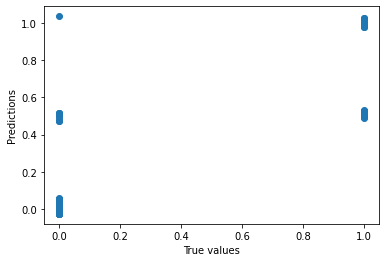

In [ ]:
#import matplot
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions) #scatter plot
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
#imbalanced data need to balance